## Diebold Mariano Test
1. Data Preparation: Load Forecasts and Actual Values for h = 1, 4, 12
2. Check if errors are covariance stationary + Plot losses to see if Stationary
3. If stationary perform DB test against the Benchmark (Naive Mean Model)

In [1]:
# NB config
%load_ext autoreload
%autoreload 2

# Load Libraries
import os
import importlib
import warnings

os.chdir("../../")
print(os.getcwd())
import numpy as np
import pandas as pd
from typing import List
from pathlib import Path
from darts import TimeSeries
from arch.unitroot import DFGLS
from pprint import pprint

dm_test = importlib.import_module("Diebold-Mariano-Test.dm_test")

warnings.filterwarnings("ignore")

/Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index


/Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/darts/timeseries.py:39: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.DatetimeIndex, pd.RangeIndex, pd.Int64Index)
/Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/darts/timeseries.py:512: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  times: Union[pd.DatetimeIndex, pd.Int64Index],
/Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/darts/timeseries.py:738: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a fu

In [2]:
# Data Dir
data_dir = Path("forecasting/data/modelling")

# BTC-USD data
btc_usd_fp = data_dir / "btc_usd_weekly.csv"
btc_usd_df = pd.read_csv(btc_usd_fp)

# h = 1 (Weekly Price Returns)
btc_usd_df["Price Returns (h=1)"] = np.log1p(btc_usd_df[["Price"]].pct_change(1))

# h = 4 (4 Week Price Returns)
btc_usd_df["Price Returns (h=4)"] = np.log1p(btc_usd_df[["Price"]].pct_change(4))

# h = 12 (12 Week Price Returns)
btc_usd_df["Price Returns (h=12)"] = np.log1p(btc_usd_df[["Price"]].pct_change(12))

# Create TimeSeries
# h = 1 (Weekly Price Returns)
btc_usd1_ts = TimeSeries.from_dataframe(
    btc_usd_df[["Date", "Price Returns (h=1)"]].dropna(), time_col="Date"
)

# h = 4 (4 Week Price Returns)
btc_usd4_ts = TimeSeries.from_dataframe(
    btc_usd_df[["Date", "Price Returns (h=4)"]].dropna(), time_col="Date"
)

# h = 12 (12 Week Price Returns)
btc_usd12_ts = TimeSeries.from_dataframe(
    btc_usd_df[["Date", "Price Returns (h=12)"]].dropna(), time_col="Date"
)

In [3]:
# BTC USD stats
btc_usd_price_ts = TimeSeries.from_dataframe(btc_usd_df[["Price"]])

# Mean
print(f"Mean: {btc_usd_price_ts.mean().Price}")

# Std Dev
print(f"Std Dev: {btc_usd_price_ts.std().Price}")

# Skew
print(f"Skew: {btc_usd_price_ts.skew().Price}")

# Kurtosis
print(f"Kurtosis: {btc_usd_price_ts.kurtosis().Price}")

Mean: 10839.550217836235
Std Dev: 15837.781624752768
Skew: 1.996170727504052
Kurtosis: 2.871372776581208


### Load Forecasts

In [4]:
rf_forecasts_dir = Path("forecasting/data/forecasts/random_forest")

# Model A
rfA1_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_A" / "rf_model_A_h1.csv", time_col="time"
)
rfA4_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_A" / "rf_model_A_h4.csv", time_col="time"
)
rfA12_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_A" / "rf_model_A_h12.csv", time_col="time"
)

# Model B
rfB1_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_B" / "rf_model_B_h1.csv", time_col="time"
)
rfB4_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_B" / "rf_model_B_h4.csv", time_col="time"
)
rfB12_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_B" / "rf_model_B_h12.csv", time_col="time"
)

# Model C
rfC1_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_C" / "rf_model_C_h1.csv", time_col="time"
)
rfC4_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_C" / "rf_model_C_h4.csv", time_col="time"
)
rfC12_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_C" / "rf_model_C_h12.csv", time_col="time"
)

# Model D
rfD1_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_D" / "rf_model_D_h1.csv", time_col="time"
)
rfD4_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_D" / "rf_model_D_h4.csv", time_col="time"
)
rfD12_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_D" / "rf_model_D_h12.csv", time_col="time"
)

# Model E
rfE1_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_E" / "rf_model_E_h1.csv", time_col="time"
)
rfE4_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_E" / "rf_model_E_h4.csv", time_col="time"
)
rfE12_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_E" / "rf_model_E_h12.csv", time_col="time"
)

# Model F
rfF1_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_F" / "rf_model_F_h1.csv", time_col="time"
)
rfF4_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_F" / "rf_model_F_h4.csv", time_col="time"
)
rfF12_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_F" / "rf_model_F_h12.csv", time_col="time"
)

# Model G
rfG1_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_G" / "rf_model_G_h1.csv", time_col="time"
)
rfG4_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_G" / "rf_model_G_h4.csv", time_col="time"
)
rfG12_forecast = TimeSeries.from_csv(
    rf_forecasts_dir / "model_G" / "rf_model_G_h12.csv", time_col="time"
)

In [5]:
# Benchmark
bench_forecast_dir = Path("forecasting/data/forecasts/mean_model")

mean1_forecast = TimeSeries.from_csv(
    bench_forecast_dir / "mean_model_h1.csv", time_col="time"
)
mean4_forecast = TimeSeries.from_csv(
    bench_forecast_dir / "mean_model_h4.csv", time_col="time"
)
mean12_forecast = TimeSeries.from_csv(
    bench_forecast_dir / "mean_model_h12.csv", time_col="time"
)

In [6]:
def mse_custom(y_actual: TimeSeries, y_pred: TimeSeries):
    y_actual_red = y_actual.slice_intersect(y_pred).all_values().squeeze(-1)
    y_pred_red = y_pred.all_values().squeeze(-1)
    mse = (y_actual_red - y_pred_red) ** 2
    return mse

### Check Loss Differential Covariance Stationarity

#### 1. h1 models

In [7]:
# Compute H1 Losses

bench1_loss = mse_custom(btc_usd1_ts, mean1_forecast)
rfA1_loss = mse_custom(btc_usd1_ts, rfA1_forecast)
rfB1_loss = mse_custom(btc_usd1_ts, rfB1_forecast)
rfC1_loss = mse_custom(btc_usd1_ts, rfC1_forecast)
rfD1_loss = mse_custom(btc_usd1_ts, rfD1_forecast)
rfE1_loss = mse_custom(btc_usd1_ts, rfE1_forecast)
rfF1_loss = mse_custom(btc_usd1_ts, rfF1_forecast)
rfG1_loss = mse_custom(btc_usd1_ts, rfG1_forecast)

h1_names = ["baseline", "Model A", "Model B", "Model C", "Model D", "Model E", "Model F"]
h1_losses = [
    rfA1_loss,
    rfB1_loss,
    rfF1_loss,
    rfC1_loss,
    rfD1_loss,
    rfE1_loss,
    rfG1_loss 
]

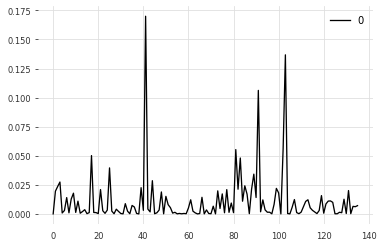

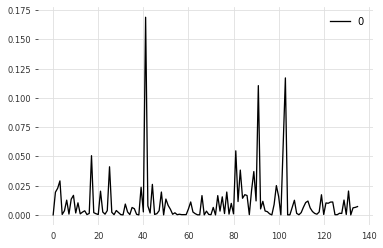

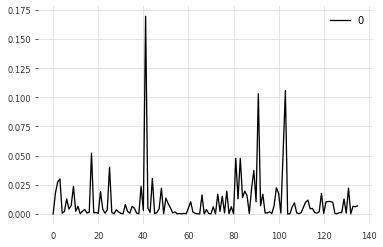

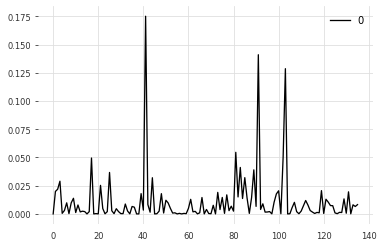

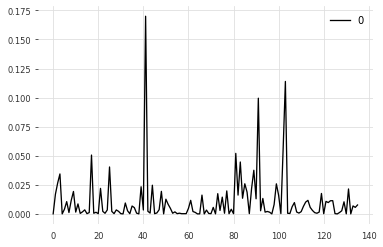

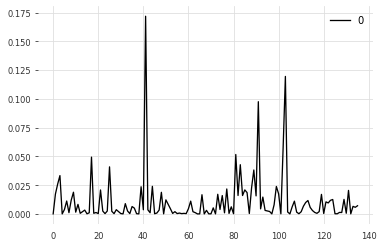

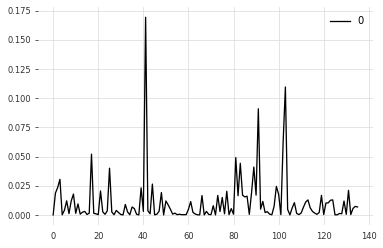

In [44]:
for i in h1_losses:
    pd.DataFrame(i.squeeze(-1)).plot()

In [9]:
# Check Stationarity
h1_cov_stat_res = {}

for name, i in zip(h1_names, h1_losses):
    computed = DFGLS(i)
    summary = {
        "stat": computed.stat,
        "p_val": computed.pvalue,
        "num_lags": computed.lags,
        "is_stationary": computed.pvalue < 0.05,
    }
    h1_cov_stat_res[name] = summary

pprint(h1_cov_stat_res)

{'Model A': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 5.172068710681032e-17,
             'stat': -9.999853411787617},
 'Model B': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 3.685236559596351e-17,
             'stat': -10.074572992938437},
 'Model C': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 1.425797375440484e-17,
             'stat': -10.286097678437486},
 'Model D': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 4.331680096277558e-17,
             'stat': -10.038894573865408},
 'Model E': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 9.269312766980521e-17,
             'stat': -9.872121420379186},
 'Model F': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 1.7330357586720413e-16,
             'stat': -9.736295308806763},
 'baseline': {'is_stationary': True,
              'num_lags': 0,
              'p_val': 6

#### 2. h4 models

In [10]:
# Compute H4 Losses

bench4_loss = mse_custom(btc_usd4_ts, mean4_forecast)
rfA4_loss = mse_custom(btc_usd4_ts, rfA4_forecast)
rfB4_loss = mse_custom(btc_usd4_ts, rfB4_forecast)
rfC4_loss = mse_custom(btc_usd4_ts, rfC4_forecast)
rfD4_loss = mse_custom(btc_usd4_ts, rfD4_forecast)
rfE4_loss = mse_custom(btc_usd4_ts, rfE4_forecast)
rfF4_loss = mse_custom(btc_usd4_ts, rfF4_forecast)
rfG4_loss = mse_custom(btc_usd4_ts, rfG4_forecast)

h4_names = ["baseline", "Model A", "Model B", "Model C", "Model D", "Model E", "Model F"]
h4_losses = [
    rfA4_loss,
    rfB4_loss,
    rfF4_loss,
    rfC4_loss,
    rfD4_loss,
    rfE4_loss,
    rfG4_loss 
]

In [11]:
# Check Stationarity
h4_cov_stat_res = {}

for name, i in zip(h4_names, h4_losses):
    computed = DFGLS(i)
    summary = {
        "stat": computed.stat,
        "p_val": computed.pvalue,
        "num_lags": computed.lags,
        "is_stationary": computed.pvalue < 0.05,
    }
    h4_cov_stat_res[name] = summary

pprint(h4_cov_stat_res)

{'Model A': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 3.29725323614587e-13,
             'stat': -8.162629820379635},
 'Model B': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 5.272817801317614e-12,
             'stat': -7.6005584212679},
 'Model C': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 2.8013589633756594e-12,
             'stat': -7.72861401073712},
 'Model D': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 1.495161828548182e-12,
             'stat': -7.8557989488988875},
 'Model E': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 1.6134730938826566e-12,
             'stat': -7.840367486119828},
 'Model F': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 6.386637351339247e-12,
             'stat': -7.5617583425168124},
 'baseline': {'is_stationary': True,
              'num_lags': 0,
              'p_val': 1.217

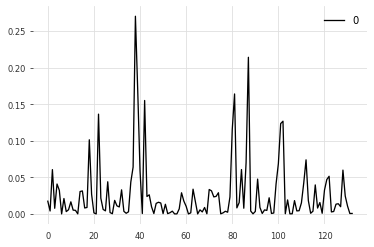

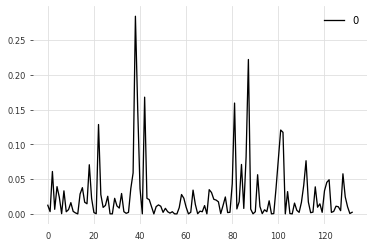

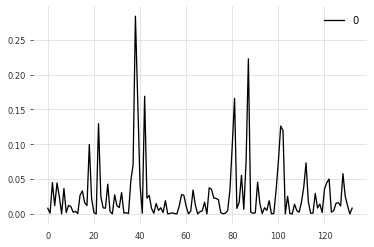

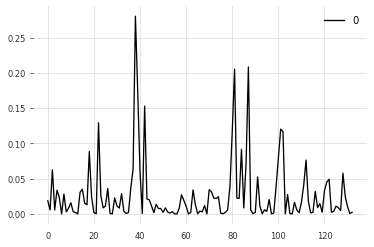

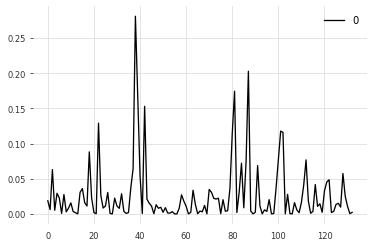

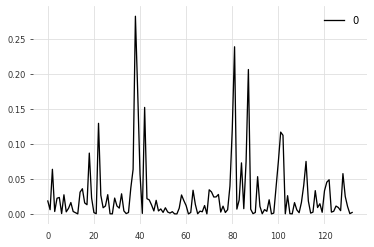

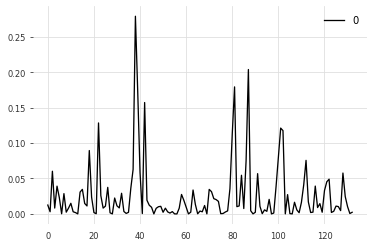

In [45]:
for i in h4_losses:
    pd.DataFrame(i.squeeze(-1)).plot()

#### 3. h12 models

In [12]:
# Compute H12 Losses

bench12_loss = mse_custom(btc_usd12_ts, mean12_forecast)
rfA12_loss = mse_custom(btc_usd12_ts, rfA12_forecast)
rfB12_loss = mse_custom(btc_usd12_ts, rfB12_forecast)
rfC12_loss = mse_custom(btc_usd12_ts, rfC12_forecast)
rfD12_loss = mse_custom(btc_usd12_ts, rfD12_forecast)
rfE12_loss = mse_custom(btc_usd12_ts, rfE12_forecast)
rfF12_loss = mse_custom(btc_usd12_ts, rfF12_forecast)
rfG12_loss = mse_custom(btc_usd12_ts, rfG12_forecast)

h12_names = ["baseline", "Model A", "Model B", "Model C", "Model D", "Model E", "Model F"]
h12_losses = [
    rfA12_loss,
    rfB12_loss,
    rfF12_loss,
    rfC12_loss,
    rfD12_loss,
    rfE12_loss,
    rfG12_loss 
]

In [13]:
# Check Stationarity
h12_cov_stat_res = {}

for name, i in zip(h12_names, h12_losses):
    computed = DFGLS(i)
    summary = {
        "stat": computed.stat,
        "p_val": computed.pvalue,
        "num_lags": computed.lags,
        "is_stationary": computed.pvalue < 0.05,
    }
    h12_cov_stat_res[name] = summary

pprint(h12_cov_stat_res)

{'Model A': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 4.87174246392154e-13,
             'stat': -8.083286035911724},
 'Model B': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 9.641843795249509e-11,
             'stat': -7.011122546974434},
 'Model C': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 9.33248022506735e-13,
             'stat': -7.9513470667898165},
 'Model D': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 9.058506357552613e-13,
             'stat': -7.957390430772302},
 'Model E': {'is_stationary': True,
             'num_lags': 1,
             'p_val': 1.5694477933406433e-08,
             'stat': -5.958055470837175},
 'Model F': {'is_stationary': True,
             'num_lags': 0,
             'p_val': 9.508193184176232e-13,
             'stat': -7.947564028520833},
 'baseline': {'is_stationary': True,
              'num_lags': 0,
              'p_val': 1.637

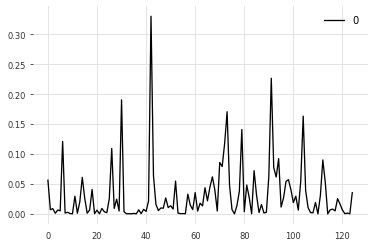

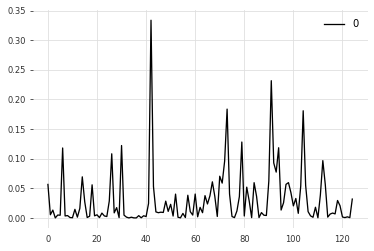

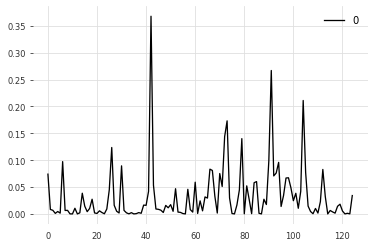

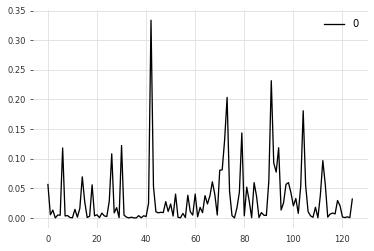

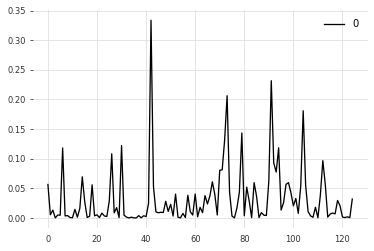

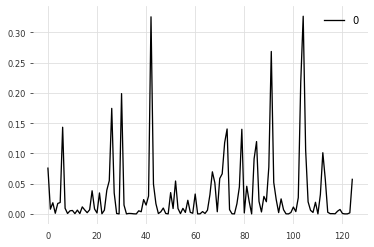

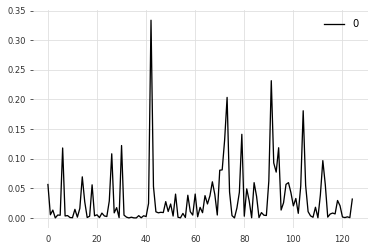

In [46]:
for i in h12_losses:
    pd.DataFrame(i.squeeze(-1)).plot()

### Diebold Mariano Test for Equivalent Forecasts (MSE)

#### Helper to deal with Scientific Notation

In [14]:
def ts_to_list(l: TimeSeries) -> List[float]:
    return list(l.values().squeeze(-1))

#### 1. H1 models

In [15]:
# Y_actual for h1
h1_actual = list(btc_usd1_ts.slice_intersect(mean1_forecast).values().squeeze(-1))

# Benchmark 1
bench1_forecast = ts_to_list(mean1_forecast)

In [16]:
# Best H1 (Model C) vs Baseline = Model A
best_h1_base_rt = dm_test.dm_test(
    h1_actual, ts_to_list(rfC1_forecast), ts_to_list(rfA1_forecast), h=1, crit="MSE"
)
print(
    "No difference"
    if best_h1_base_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"Model C vs Baseline --- DM stat: {best_h1_base_rt.DM} | P-val: {best_h1_base_rt.p_value}")

# Best H1 (Model C) vs Model A (Lucey-Price) = Model B
best_h1_lucey_price_rt = dm_test.dm_test(
    h1_actual, ts_to_list(rfC1_forecast), ts_to_list(rfB1_forecast), h=1, crit="MSE"
)
print(
    "No difference"
    if best_h1_lucey_price_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"Model C vs Model A --- DM stat: {best_h1_lucey_price_rt.DM} | P-val: {best_h1_lucey_price_rt.p_value}")

No difference
Model C vs Baseline --- DM stat: -0.31668252717837 | P-val: 0.7519736796306602
No difference
Model C vs Model A --- DM stat: 0.4543869391209532 | P-val: 0.6502800982388846


In [17]:
# WARNING: LABEL MAPPINGS HERE ARE NOT UPDATED
# Model A
modelA_rt = dm_test.dm_test(
    h1_actual, ts_to_list(rfA1_forecast), ts_to_list(mean1_forecast), h=1, crit="MSE"
)
print(
    f"RF Model A - Average MSE: {np.mean(rfA1_loss)} | Benchmark - Average MSE: {np.mean(bench1_loss)}"
)
print(
    "No difference"
    if modelA_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"DM stat: {modelA_rt.DM} | P-val: {modelA_rt.p_value}")

# Model B
modelB_rt = dm_test.dm_test(
    h1_actual, ts_to_list(rfB1_forecast), bench1_forecast, h=1, crit="MSE"
)
print(
    f"RF Model B - Average MSE: {np.mean(rfB1_loss)} | Benchmark - Average MSE: {np.mean(bench1_loss)}"
)
print(
    "No difference"
    if modelB_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"DM stat: {modelB_rt.DM} | P-val: {modelB_rt.p_value}")

# Model C
modelC_rt = dm_test.dm_test(
    h1_actual, ts_to_list(rfC1_forecast), bench1_forecast, h=1, crit="MSE"
)
print(
    f"RF Model C - Average MSE: {np.mean(rfC1_loss)} | Benchmark - Average MSE: {np.mean(bench1_loss)}"
)
print(
    "No difference"
    if modelC_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"DM stat: {modelC_rt.DM} | P-val: {modelC_rt.p_value}")

# Model D
modelD_rt = dm_test.dm_test(
    h1_actual, ts_to_list(rfD1_forecast), bench1_forecast, h=1, crit="MSE"
)
print(
    f"RF Model D - Average MSE: {np.mean(rfD1_loss)} | Benchmark - Average MSE: {np.mean(bench1_loss)}"
)
print(
    "No difference"
    if modelD_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"DM stat: {modelD_rt.DM} | P-val: {modelD_rt.p_value}")

# Model E
modelE_rt = dm_test.dm_test(
    h1_actual, ts_to_list(rfE1_forecast), bench1_forecast, h=1, crit="MSE"
)
print(
    f"RF Model E - Average MSE: {np.mean(rfE1_loss)} | Benchmark - Average MSE: {np.mean(bench1_loss)}"
)
print(
    "No difference"
    if modelE_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"DM stat: {modelE_rt.DM} | P-val: {modelE_rt.p_value}")

# Model F
modelF_rt = dm_test.dm_test(
    h1_actual, ts_to_list(rfF1_forecast), bench1_forecast, h=1, crit="MSE"
)
print(
    f"RF Model F - Average MSE: {np.mean(rfF1_loss)} | Benchmark - Average MSE: {np.mean(bench1_loss)}"
)
print(
    "No difference"
    if modelF_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"DM stat: {modelF_rt.DM} | P-val: {modelF_rt.p_value}")

RF Model A - Average MSE: 0.010963582785105327 | Benchmark - Average MSE: 0.010093014957234308
No difference
DM stat: 1.6174377302557224 | P-val: 0.10811806690708112
RF Model B - Average MSE: 0.010713824271773708 | Benchmark - Average MSE: 0.010093014957234308
No difference
DM stat: 1.3761249838842105 | P-val: 0.17106142289774973
RF Model C - Average MSE: 0.010859408060493144 | Benchmark - Average MSE: 0.010093014957234308
No difference
DM stat: 1.0752143952530406 | P-val: 0.2841966507603747
RF Model D - Average MSE: 0.01061701876185649 | Benchmark - Average MSE: 0.010093014957234308
No difference
DM stat: 1.305006465307292 | P-val: 0.19411066181966552
RF Model E - Average MSE: 0.010705169464729228 | Benchmark - Average MSE: 0.010093014957234308
No difference
DM stat: 1.5849343225369537 | P-val: 0.1153209809803365
RF Model F - Average MSE: 0.010548157082393124 | Benchmark - Average MSE: 0.010093014957234308
No difference
DM stat: 1.1681521020344576 | P-val: 0.24480424419232022


#### 2. H4 models

In [18]:
# Y_actual for h4
h4_actual = list(btc_usd4_ts.slice_intersect(mean4_forecast).values().squeeze(-1))

# Benchmark 4
bench4_forecast = ts_to_list(mean4_forecast)

In [19]:
# Best H4 (Model F = G) vs Baseline = Model A
best_h4_base_rt = dm_test.dm_test(
    h4_actual, ts_to_list(rfG4_forecast), ts_to_list(rfA4_forecast), h=4, crit="MSE"
)
print(
    "No difference"
    if best_h4_base_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"Model F vs Baseline --- DM stat: {best_h4_base_rt.DM} | P-val: {best_h4_base_rt.p_value}")

# Best H4 (Model F = G) vs Model A (Lucey-Price) = Model B
best_h4_lucey_price_rt = dm_test.dm_test(
    h4_actual, ts_to_list(rfG4_forecast), ts_to_list(rfB4_forecast), h=4, crit="MSE"
)
print(
    "No difference"
    if best_h4_lucey_price_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"Model F vs Model A --- DM stat: {best_h4_lucey_price_rt.DM} | P-val: {best_h4_lucey_price_rt.p_value}")

No difference
Model F vs Baseline --- DM stat: -1.401711784024596 | P-val: 0.1633483478730139
No difference
Model F vs Model A --- DM stat: 0.594539229739561 | P-val: 0.5531692118381983


In [20]:
# Model A
modelA_rt = dm_test.dm_test(
    h4_actual, ts_to_list(rfA4_forecast), bench4_forecast, h=4, crit="MSE"
)

print(
    "No difference"
    if modelA_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model A - Average MSE: {np.mean(rfA4_loss)} | Benchmark - Average MSE: {np.mean(bench4_loss)}"
)
print(f"DM stat: {modelA_rt.DM} | P-val: {modelA_rt.p_value}")

# Model B
modelB_rt = dm_test.dm_test(
    h4_actual, ts_to_list(rfB4_forecast), bench4_forecast, h=4, crit="MSE"
)

print(
    "No difference"
    if modelB_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model B - Average MSE: {np.mean(rfB4_loss)} | Benchmark - Average MSE: {np.mean(bench4_loss)}"
)
print(f"DM stat: {modelB_rt.DM} | P-val: {modelB_rt.p_value}")

# Model C
modelC_rt = dm_test.dm_test(
    h4_actual, ts_to_list(rfC4_forecast), bench4_forecast, h=4, crit="MSE"
)

print(
    "No difference"
    if modelC_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model C - Average MSE: {np.mean(rfC4_loss)} | Benchmark - Average MSE: {np.mean(bench4_loss)}"
)
print(f"DM stat: {modelC_rt.DM} | P-val: {modelC_rt.p_value}")

# Model D
modelD_rt = dm_test.dm_test(
    h4_actual, ts_to_list(rfD4_forecast), bench4_forecast, h=4, crit="MSE"
)

print(
    "No difference"
    if modelD_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model D - Average MSE: {np.mean(rfD4_loss)} | Benchmark - Average MSE: {np.mean(bench4_loss)}"
)
print(f"DM stat: {modelD_rt.DM} | P-val: {modelD_rt.p_value}")

# Model E
modelE_rt = dm_test.dm_test(
    h4_actual, ts_to_list(rfE4_forecast), bench4_forecast, h=4, crit="MSE"
)

print(
    "No difference"
    if modelE_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model E - Average MSE: {np.mean(rfE4_loss)} | Benchmark - Average MSE: {np.mean(bench4_loss)}"
)
print(f"DM stat: {modelE_rt.DM} | P-val: {modelE_rt.p_value}")

# Model F
modelF_rt = dm_test.dm_test(
    h4_actual, ts_to_list(rfF4_forecast), bench4_forecast, h=4, crit="MSE"
)

print(
    "No difference"
    if modelF_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model F - Average MSE: {np.mean(rfF4_loss)} | Benchmark - Average MSE: {np.mean(bench4_loss)}"
)
print(f"DM stat: {modelF_rt.DM} | P-val: {modelF_rt.p_value}")

Statistically significant difference
RF Model A - Average MSE: 0.02679401802193071 | Benchmark - Average MSE: 0.04789875115502448
DM stat: -3.739681242161286 | P-val: 0.00027359681992139475
Statistically significant difference
RF Model B - Average MSE: 0.02580089019239007 | Benchmark - Average MSE: 0.04789875115502448
DM stat: -3.6086229549628532 | P-val: 0.0004356833985656234
Statistically significant difference
RF Model C - Average MSE: 0.02718003984748903 | Benchmark - Average MSE: 0.04789875115502448
DM stat: -3.988684685354658 | P-val: 0.00010950836747202157
Statistically significant difference
RF Model D - Average MSE: 0.026837666679405667 | Benchmark - Average MSE: 0.04789875115502448
DM stat: -3.87492077757192 | P-val: 0.0001672391199872854
Statistically significant difference
RF Model E - Average MSE: 0.027162916100176227 | Benchmark - Average MSE: 0.04789875115502448
DM stat: -4.034707683795085 | P-val: 9.204832598667079e-05
Statistically significant difference
RF Model F - A

#### 3. H12 models

In [21]:
# Y_actual for h4
h12_actual = list(btc_usd12_ts.slice_intersect(mean12_forecast).values().squeeze(-1))

# Benchmark 4
bench12_forecast = ts_to_list(mean12_forecast)

In [22]:
# Best H12 (Model B = F) vs Baseline = Model A
best_h12_base_rt = dm_test.dm_test(
    h12_actual, ts_to_list(rfF12_forecast), ts_to_list(rfA12_forecast), h=12, crit="MSE"
)
print(
    "No difference"
    if best_h12_base_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"Model B vs Baseline --- DM stat: {best_h12_base_rt.DM} | P-val: {best_h12_base_rt.p_value}")

# Best H12 (Model B = F) vs Model A (Lucey-Price) = Model B
best_h12_lucey_price_rt = dm_test.dm_test(
    h12_actual, ts_to_list(rfF12_forecast), ts_to_list(rfB12_forecast), h=12, crit="MSE"
)
print(
    "No difference"
    if best_h12_lucey_price_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(f"Model B vs Model A --- DM stat: {best_h12_lucey_price_rt.DM} | P-val: {best_h12_lucey_price_rt.p_value}")

No difference
Model B vs Baseline --- DM stat: 0.45212575884954714 | P-val: 0.6519683064258432
No difference
Model B vs Model A --- DM stat: 0.9029404699091057 | P-val: 0.3683081879224932


In [23]:
# Model A
modelA_rt = dm_test.dm_test(
    h12_actual, ts_to_list(rfA12_forecast), bench12_forecast, h=12, crit="MSE"
)

print(
    "No difference"
    if modelA_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model A - Average MSE: {np.mean(rfA12_loss)} | Benchmark - Average MSE: {np.mean(bench12_loss)}"
)
print(f"DM stat: {modelA_rt.DM} | P-val: {modelA_rt.p_value}")

# Model B
modelB_rt = dm_test.dm_test(
    h12_actual, ts_to_list(rfB12_forecast), bench12_forecast, h=12, crit="MSE"
)

print(
    "No difference"
    if modelB_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model B - Average MSE: {np.mean(rfB12_loss)} | Benchmark - Average MSE: {np.mean(bench12_loss)}"
)
print(f"DM stat: {modelB_rt.DM} | P-val: {modelB_rt.p_value}")

# Model C
modelC_rt = dm_test.dm_test(
    h12_actual, ts_to_list(rfC12_forecast), bench12_forecast, h=12, crit="MSE"
)

print(
    "No difference"
    if modelC_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model C - Average MSE: {np.mean(rfC12_loss)} | Benchmark - Average MSE: {np.mean(bench12_loss)}"
)
print(f"DM stat: {modelC_rt.DM} | P-val: {modelC_rt.p_value}")

# Model D
modelD_rt = dm_test.dm_test(
    h12_actual, ts_to_list(rfD12_forecast), bench12_forecast, h=12, crit="MSE"
)

print(
    "No difference"
    if modelD_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model D - Average MSE: {np.mean(rfD12_loss)} | Benchmark - Average MSE: {np.mean(bench12_loss)}"
)
print(f"DM stat: {modelD_rt.DM} | P-val: {modelD_rt.p_value}")

# Model E
modelE_rt = dm_test.dm_test(
    h12_actual, ts_to_list(rfE12_forecast), bench12_forecast, h=12, crit="MSE"
)

print(
    "No difference"
    if modelE_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model E - Average MSE: {np.mean(rfE12_loss)} | Benchmark - Average MSE: {np.mean(bench12_loss)}"
)
print(f"DM stat: {modelE_rt.DM} | P-val: {modelE_rt.p_value}")

# Model F
modelF_rt = dm_test.dm_test(
    h12_actual, ts_to_list(rfF12_forecast), bench12_forecast, h=12, crit="MSE"
)

print(
    "No difference"
    if modelF_rt.p_value > 0.05
    else "Statistically significant difference"
)
print(
    f"RF Model F - Average MSE: {np.mean(rfF12_loss)} | Benchmark - Average MSE: {np.mean(bench12_loss)}"
)
print(f"DM stat: {modelF_rt.DM} | P-val: {modelF_rt.p_value}")

Statistically significant difference
RF Model A - Average MSE: 0.0317388863676472 | Benchmark - Average MSE: 0.15973102025812233
DM stat: -2.0020165499765867 | P-val: 0.04746510006278663
Statistically significant difference
RF Model B - Average MSE: 0.031207573837571445 | Benchmark - Average MSE: 0.15973102025812233
DM stat: -2.0018090868553697 | P-val: 0.047487726405793865
Statistically significant difference
RF Model C - Average MSE: 0.03222253278295989 | Benchmark - Average MSE: 0.15973102025812233
DM stat: -2.014360888047585 | P-val: 0.046135217397576735
Statistically significant difference
RF Model D - Average MSE: 0.032229740025118525 | Benchmark - Average MSE: 0.15973102025812233
DM stat: -2.0143132710040477 | P-val: 0.0461402856369366
No difference
RF Model E - Average MSE: 0.03345471423159043 | Benchmark - Average MSE: 0.15973102025812233
DM stat: -1.9735915811726297 | P-val: 0.05065189281156257
Statistically significant difference
RF Model F - Average MSE: 0.03262765622447648